In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Displacement
## dxy, BS, PV related variables

## dxy

4mu dxy structure: [[-0.000496, 5.27e-05, 0.000965, 0.0075], ... [0.00324, 0.00124, -0.00723, 0.000676]]
2mu2e dxy structure: [[0.00468, -0.0153], [-0.000268, 0.0246], ... -0.00116, 0.019], [-0.000397, 0.00179]]
4mu dxy structure: [[-0.000659, -0.0109, -0.00488, 0.0128], ... [0.0257, 0.0052, -0.000461, -0.0741]]
2mu2e dxy structure: [[0.03, -0.0351], [0.0282, -1.18], ... [-0.00922, 0.018], [0.117, -0.192]]
4mu dxy structure: [[-0.0321, 0.0205, 0.0764, -0.041, 0.0158], ... [0.0246, 0.207, -0.464, -0.366]]
2mu2e dxy structure: [[-0.052, 0.0621], [0.103, -0.131], [0.206, ... [0.115, -1.46], [0.028, -0.137]]
4mu dxy structure: [[-0.0369, 0.13, 0.00982, -0.904], [0.0031, ... [0.0518, 0.494, -1.28, -2.86]]
2mu2e dxy structure: [[-0.18, 0.395], [0.0264, -0.601], [1.02], ... [0.0817, -0.198], [0.104], [0.0178]]
4mu dxy structure: [[-0.0719, -0.0023, 0.335], [], ... [0.178, 0.0317, -0.113, -0.0259, -0.000731]]
2mu2e dxy structure: [[-0.00366, 0.957, 0.00099], [-0.00397], ... [-0.175, 0.894], [0

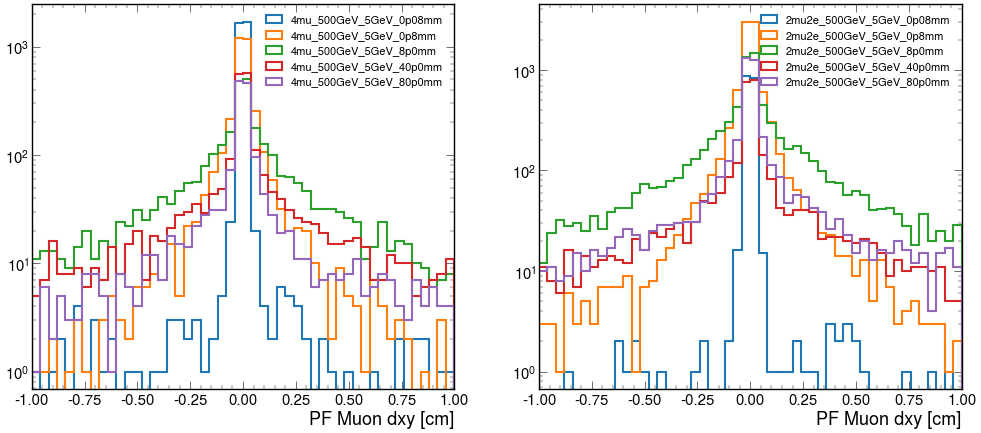

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxy [cm]')
ax[1].set_xlabel('PF Muon dxy [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxy.png", bbox_inches="tight")

## dxyErr

4mu dxyErr structure: [[0.000778, 0.000992, 0.000885, 0.00104], ... [0.00116, 0.0013, 0.00113, 0.00124]]
2mu2e dxyErr structure: [[0.0013, 0.00156], [0.000946, 0.0022], ... [0.00131, 0.0014], [0.00124, 0.00113]]
4mu dxyErr structure: [[0.00124, 0.00229, 0.0104, 0.00101], ... [0.00108, 0.000961, 0.000946, 0.00108]]
2mu2e dxyErr structure: [[0.00177, 0.00177], [0.00143, 0.00757], ... [0.00143, 0.0013], [0.00145, 0.00189]]
4mu dxyErr structure: [[0.00162, 0.00253, 0.00145, 0.0996, ... 0.00189, 0.00259, 0.00604, 0.00226]]
2mu2e dxyErr structure: [[0.00157, 0.00142], [0.00739, 0.0151], ... [0.00458, 0.0103], [0.0986, 0.0222]]
4mu dxyErr structure: [[0.0977, 0.0025, 0.0996, 0.0148], [0.0996, ... [0.0977, 0.0127, 0.0957, 0.0188]]
2mu2e dxyErr structure: [[0.00665, 0.00388], [0.00223, 0.00317], ... 0.00247], [0.0104], [0.0986]]
4mu dxyErr structure: [[0.0996, 0.0996, 0.0069], [], ... [0.0145, 0.0986, 0.0996, 0.0996, 0.00391]]
2mu2e dxyErr structure: [[0.0986, 0.0337, 0.0996], [0.0996], ... [0.

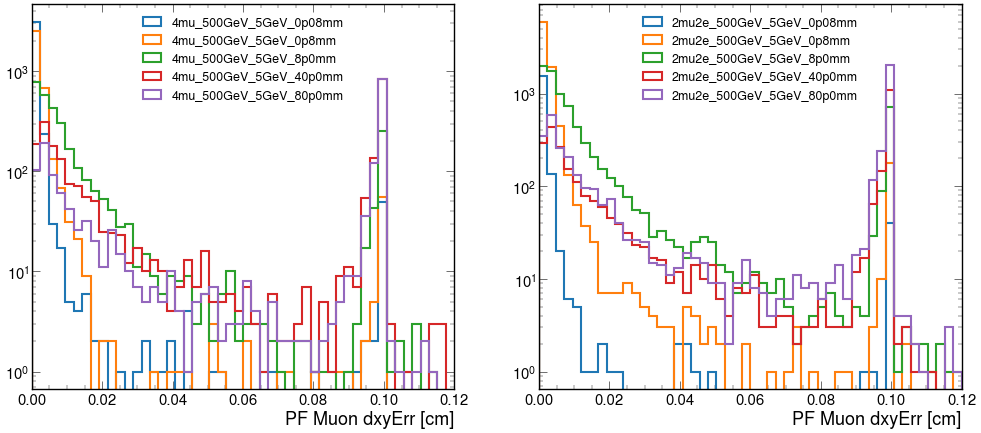

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyErr", events_4mu[i_4mu].dxyErr, events_2mu2e[i_2mu].dxyErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyErr), range=(0,0.12), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyErr), range=(0,0.12), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,0.12)
ax[1].set_xlim(0,0.12)
ax[0].set_xlabel('PF Muon dxyErr [cm]')
ax[1].set_xlabel('PF Muon dxyErr [cm]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyErr.png", bbox_inches="tight")

## dxybs

4mu dxybs structure: [[0.000564, -0.001, 0.00201, 0.00645], ... [0.00141, 0.00295, -0.00558, -0.00114]]
2mu2e dxybs structure: [[0.00551, -0.0146], [-0.000456, 0.0245, ... -0.00268, 0.0174], [-0.000702, 0.00149]]
4mu dxybs structure: [[-0.00362, -0.00791, -0.00195, 0.00974], ... [0.0286, 0.00237, -0.00325, -0.0713]]
2mu2e dxybs structure: [[0.0284, -0.0367], [0.0287, -1.18], ... [-0.0126, 0.0146], [0.117, -0.192]]
4mu dxybs structure: [[-0.032, 0.0203, 0.0764, -0.0417, 0.0172], ... [0.026, 0.206, -0.465, -0.365]]
2mu2e dxybs structure: [[-0.0524, 0.0617], [0.103, -0.132], [0.208, ... [0.114, -1.46], [0.0289, -0.136]]
4mu dxybs structure: [[-0.0378, 0.131, 0.00891, -0.903], [-0.000928, ... [0.0543, 0.492, -1.28, -2.86]]
2mu2e dxybs structure: [[-0.182, 0.393], [0.0268, -0.601], [1.02], ... [0.079, -0.2], [0.104], [0.0192]]
4mu dxybs structure: [[-0.0724, -0.00196, 0.336], [], ... [0.178, 0.0311, -0.113, -0.0254, -0.00119]]
2mu2e dxybs structure: [[-0.00278, 0.958, 6.14e-06], [-0.00431],

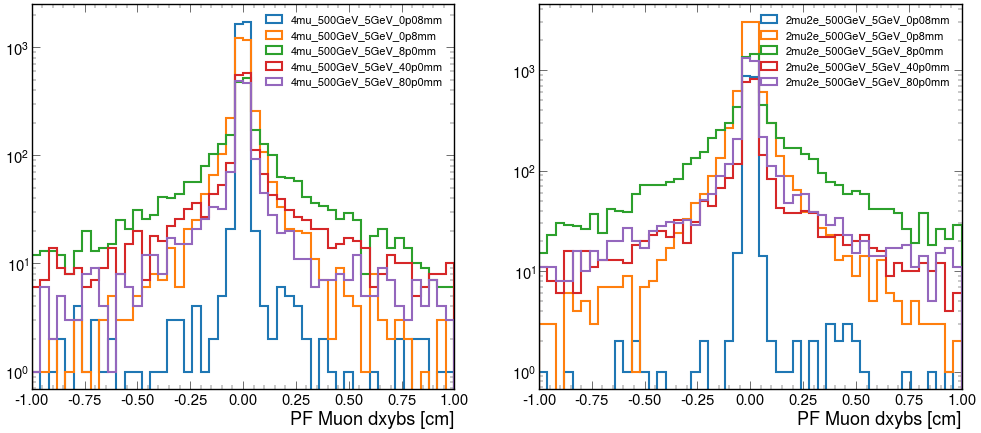

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs", events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxybs [cm]')
ax[1].set_xlabel('PF Muon dxybs [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxybs.png", bbox_inches="tight")

## dxy - dxybs

4mu dxy - dxybs structure: [[-0.00106, 0.00106, -0.00105, 0.00105], ... [0.00183, -0.00171, -0.00164, 0.00182]]
2mu2e dxy - dxybs structure: [[-0.000832, -0.00071], [0.000188, 0.000168, ... 0.00159], [0.000305, 0.000301]]
4mu dxy - dxybs structure: [[0.00296, -0.00294, -0.00293, 0.00304], ... [-0.00284, 0.00283, 0.00279, -0.00281]]
2mu2e dxy - dxybs structure: [[0.0016, 0.00165], [-0.000488, -0.000977, ... 0.00339], [-0.000122, -0.000122]]
4mu dxy - dxybs structure: [[-9.16e-05, 0.000168, 0, 0.000671, ... -0.00145, 0.00146, 0.00146, -0.00146]]
2mu2e dxy - dxybs structure: [[0.000397, 0.000397], [0.000854, 0.000854, ... 0.000977], [-0.000992, -0.000854]]
4mu dxy - dxybs structure: [[0.000885, -0.000977, 0.000908, -0.000977, ... 0.00244, -0.00195, 0.00195]]
2mu2e dxy - dxybs structure: [[0.00208, 0.00195], [-0.000366, 0], ... 0.00269, 0.00256], [0.000305], [-0.0014]]
4mu dxy - dxybs structure: [[0.000488, -0.000341, -0.00122], ... 0.000626, 0.000671, -0.000504, 0.000459]]
2mu2e dxy - dxy

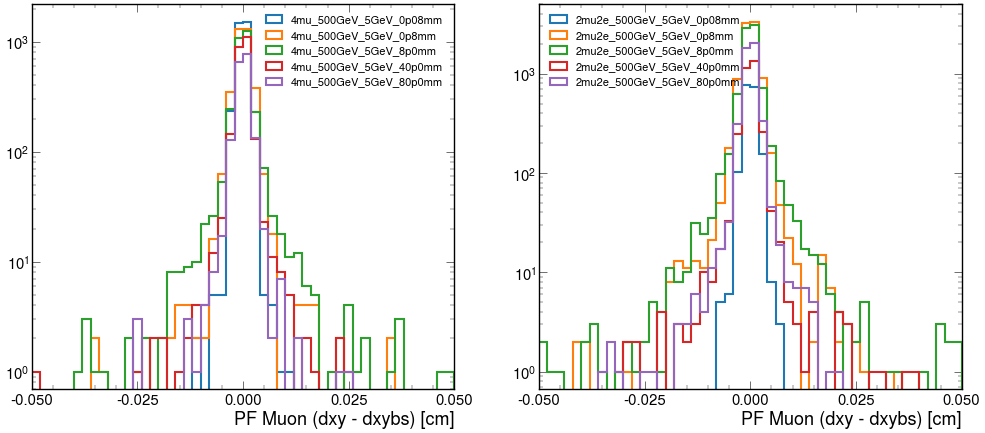

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxybs", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxybs.png", bbox_inches="tight")

## dxyPVTraj

4mu dxyPVTraj structure: [[0.000668, 0.000184, -0.000965, -0.0075, ... -0.0035, -0.00124, 0.00741, -0.000685]]
2mu2e dxyPVTraj structure: [[-0.00461, 0.0153], [0.000268, -0.0246], ... 0.00105, -0.019], [0.000414, -0.00174]]
4mu dxyPVTraj structure: [[0.000315, 0.0104, 0.00139, -0.0128], ... [-0.0256, -0.00517, 0.000403, 0.074]]
2mu2e dxyPVTraj structure: [[-0.03, 0.0348], [-0.0269, 1.18], ... [0.00912, -0.018], [-0.117, 0.192]]
4mu dxyPVTraj structure: [[0.0321, -0.0205, -0.0763, 0.0411, -0.0152], ... [-0.0235, -0.206, 0.462, 0.366]]
2mu2e dxyPVTraj structure: [[0.0522, -0.0621], [-0.104, 0.121], [-0.202, ... [-0.118, 1.46], [-0.0279, 0.14]]
4mu dxyPVTraj structure: [[0.0369, -0.13, -0.00982, 0.92], [-0.0031, ... [-0.0517, -0.497, 1.28, 2.86]]
2mu2e dxyPVTraj structure: [[0.179, -0.395], [-0.0264, 0.601], ... -0.0817, 0.198], [-0.104], [-0.0178]]
4mu dxyPVTraj structure: [[0.0719, 0.0023, -0.335], [], ... [-0.172, -0.0317, 0.113, 0.0259, 0.000731]]
2mu2e dxyPVTraj structure: [[0.00366,

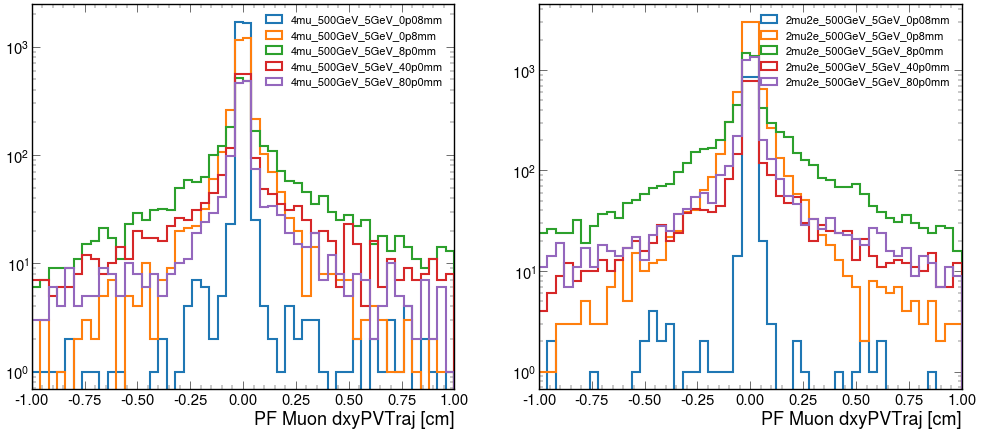

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVTraj", events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[1].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyPVTraj.png", bbox_inches="tight")

## dxy - dxyPVTraj

4mu dxy - dxyPVTraj structure: [[-0.00116, -0.000131, 0.00193, 0.015], ... [0.00675, 0.00248, -0.0146, 0.00136]]
2mu2e dxy - dxyPVTraj structure: [[0.00929, -0.0306], [-0.000536, 0.0492, ... -0.00221, 0.0379], [-0.000812, 0.00354]]
4mu dxy - dxyPVTraj structure: [[-0.000974, -0.0212, -0.00627, 0.0255], ... [0.0513, 0.0104, -0.000864, -0.148]]
2mu2e dxy - dxyPVTraj structure: [[0.0599, -0.0698], [0.0551, -2.36], ... [-0.0183, 0.036], [0.234, -0.385]]
4mu dxy - dxyPVTraj structure: [[-0.0642, 0.041, 0.153, -0.0821, 0.0309], ... [0.0481, 0.414, -0.925, -0.732]]
2mu2e dxy - dxyPVTraj structure: [[-0.104, 0.124], [0.207, -0.252], [0.409, ... [0.233, -2.93], [0.0559, -0.277]]
4mu dxy - dxyPVTraj structure: [[-0.0738, 0.259, 0.0196, -1.82], [0.00621, ... 1.45], [0.104, 0.992, -2.57, -5.72]]
2mu2e dxy - dxyPVTraj structure: [[-0.359, 0.79], [0.0528, -1.2], [2], ... [0.163, -0.396], [0.208], [0.0355]]
4mu dxy - dxyPVTraj structure: [[-0.144, -0.00459, 0.67], [], ... [0.349, 0.0634, -0.225, -0.0

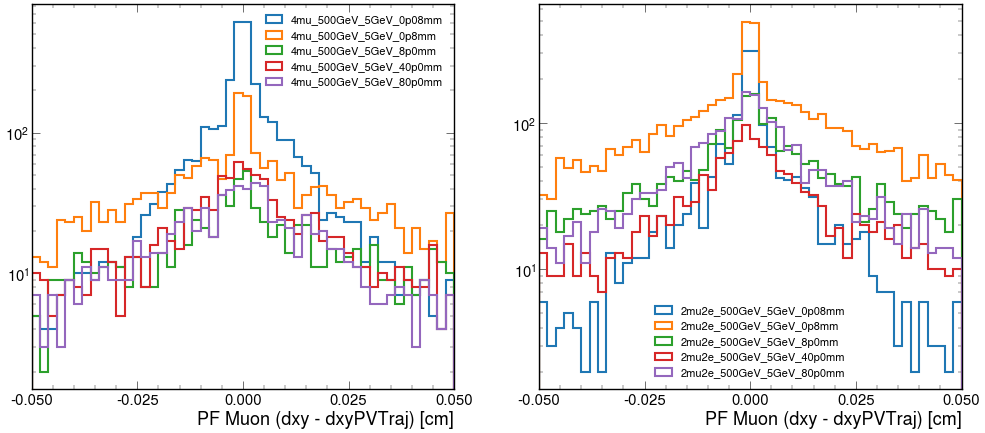

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVTraj", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyPVTraj.png", bbox_inches="tight")

## dxyPVSigned

4mu dxyPVSigned structure: [[0.000668, 0.000184, 0.000965, -0.0075], ... [0.0035, -0.00124, 0.00741, 0.000685]]
2mu2e dxyPVSigned structure: [[-0.00461, 0.0153], [0.000268, -0.0246], ... -0.00105, 0.019], [0.000414, -0.00174]]
4mu dxyPVSigned structure: [[-0.000315, -0.0104, -0.00139, -0.0128], ... [-0.0256, -0.00517, -0.000403, -0.074]]
2mu2e dxyPVSigned structure: [[-0.03, -0.0348], [-0.0269, 1.18], ... [-0.00912, -0.018], [-0.117, 0.192]]
4mu dxyPVSigned structure: [[0.0321, 0.0205, 0.0763, 0.0411, -0.0152], ... [-0.0235, -0.206, -0.462, -0.366]]
2mu2e dxyPVSigned structure: [[0.0522, -0.0621], [-0.104, -0.121], [-0.202, ... [0.118, 1.46], [-0.0279, 0.14]]
4mu dxyPVSigned structure: [[0.0369, 0.13, 0.00982, 0.92], [0.0031, ... -0.726], [0.0517, 0.497, -1.28, 2.86]]
2mu2e dxyPVSigned structure: [[-0.179, 0.395], [-0.0264, 0.601], ... -0.0817, 0.198], [-0.104], [-0.0178]]
4mu dxyPVSigned structure: [[0.0719, 0.0023, 0.335], [], ... [-0.172, 0.0317, -0.113, -0.0259, 0.000731]]
2mu2e dx

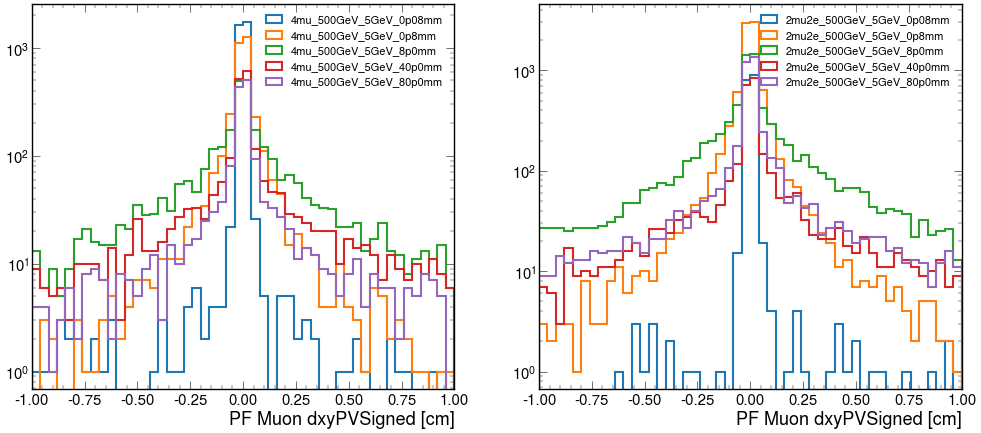

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVSigned", events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[1].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyPVSigned.png", bbox_inches="tight")

## dxy - dxyPVSigned

4mu dxy - dxyPVSigned structure: [[-0.00116, -0.000131, -1.08e-07, 0.015, ... -0.000259, 0.00248, -0.0146, -8.69e-06]]
2mu2e dxy - dxyPVSigned structure: [[0.00929, -0.0306], [-0.000536, 0.0492, ... -9.43e-06], [-0.000812, 0.00354]]
4mu dxy - dxyPVSigned structure: [[-0.000344, -0.000504, -0.00349, 0.0255], ... 0.0513, 0.0104, -5.77e-05, -6.55e-05]]
2mu2e dxy - dxyPVSigned structure: [[0.0599, -0.000294], [0.0551, -2.36], ... [-9.24e-05, 0.036], [0.234, -0.385]]
4mu dxy - dxyPVSigned structure: [[-0.0642, -3.44e-06, 6.15e-06, -0.0821, ... 0.0481, 0.414, -0.00191, -5.59e-05]]
2mu2e dxy - dxyPVSigned structure: [[-0.104, 0.124], [0.207, -0.00994], ... [-0.00351, -2.93], [0.0559, -0.277]]
4mu dxy - dxyPVSigned structure: [[-0.0738, -5.78e-05, 3.12e-07, -1.82], ... [1.3e-05, -0.00324, -2.74e-06, -5.72]]
2mu2e dxy - dxyPVSigned structure: [[-0.00126, -0.000258], [0.0528, -1.2], [2], ... [0.163, -0.396], [0.208], [0.0355]]
4mu dxy - dxyPVSigned structure: [[-0.144, -0.00459, -0.000406], ... 

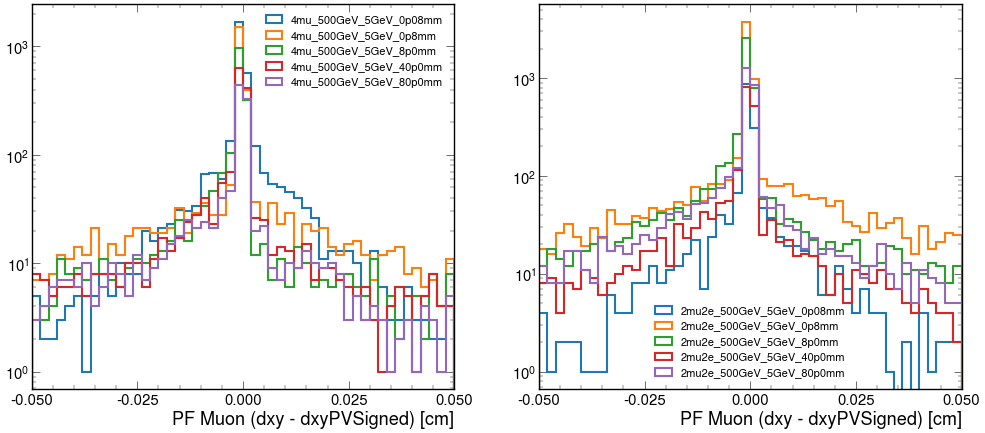

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyPVSigned.png", bbox_inches="tight")

## dxyBS

4mu dxyBS structure: [[0.000407, -0.00125, 0.00203, 0.00644], ... [0.00168, 0.00295, -0.00577, -0.00113]]
2mu2e dxyBS structure: [[0.00546, -0.0146], [-0.000459, 0.0244, ... -0.00253, 0.0174], [-0.000738, 0.00142]]
4mu dxyBS structure: [[-0.00329, -0.00739, 0.00159, 0.00972], ... [0.0284, 0.00233, -0.00321, -0.0712]]
2mu2e dxyBS structure: [[0.0284, -0.0364], [0.0274, -1.18], ... [-0.0125, 0.0146], [0.117, -0.192]]
4mu dxyBS structure: [[-0.0321, 0.0204, 0.0763, -0.0417, 0.0166], ... [0.0249, 0.205, -0.463, -0.365]]
2mu2e dxyBS structure: [[-0.0526, 0.0617], [0.103, -0.122], [0.204, ... [0.117, -1.46], [0.029, -0.139]]
4mu dxyBS structure: [[-0.0378, 0.131, 0.00891, -0.919], [-0.000895, ... [0.0542, 0.495, -1.28, -2.87]]
2mu2e dxyBS structure: [[-0.181, 0.393], [0.0267, -0.601], [0.988], ... [0.0789, -0.2], [0.104], [0.0192]]
4mu dxyBS structure: [[-0.0724, -0.00194, 0.336], [], ... [0.172, 0.0311, -0.113, -0.0254, -0.0012]]
2mu2e dxyBS structure: [[-0.00281, 0.962, 5.53e-06], [-0.0043

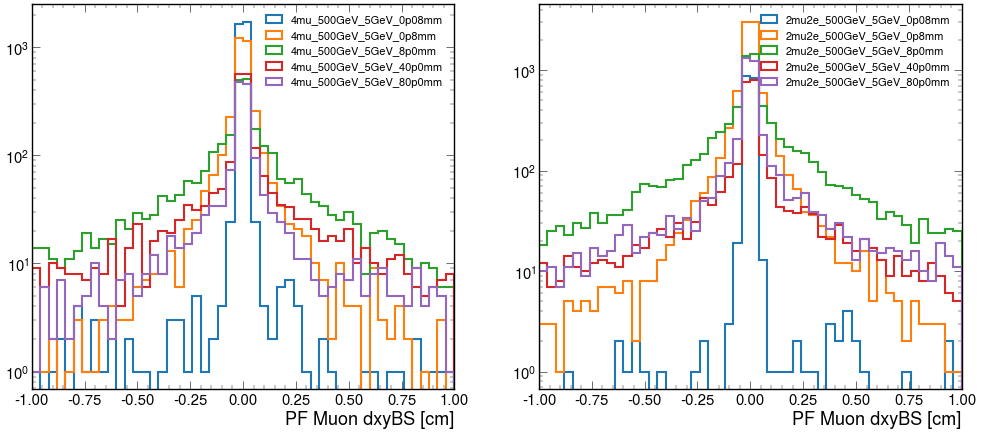

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS", events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyBS [cm]')
ax[1].set_xlabel('PF Muon dxyBS [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBS.png", bbox_inches="tight")

## dxy - dxyBS

4mu dxy - dxyBS structure: [[-0.000904, 0.00131, -0.00106, 0.00106], ... [0.00157, -0.00171, -0.00146, 0.00181]]
2mu2e dxy - dxyBS structure: [[-0.00078, -0.000703], [0.000191, 0.000223, ... 0.00154], [0.000341, 0.000373]]
4mu dxy - dxyBS structure: [[0.00263, -0.00347, -0.00647, 0.00306], ... [-0.0027, 0.00286, 0.00275, -0.00287]]
2mu2e dxy - dxyBS structure: [[0.00157, 0.00135], [0.000869, -0.000933, ... 0.00343], [-0.000168, -0.000195]]
4mu dxy - dxyBS structure: [[-6.16e-06, 0.000129, 3.56e-05, 0.000677, ... 0.00272, -0.000431, -0.00147]]
2mu2e dxy - dxyBS structure: [[0.000556, 0.000408], [0.000521, -0.00913, ... 0.00174], [-0.001, 0.00125]]
4mu dxy - dxyBS structure: [[0.000889, -0.00104, 0.000907, 0.0155], ... -0.00249, -0.000742, -0.00252, 0.00436]]
2mu2e dxy - dxyBS structure: [[0.000828, 0.00182], [-0.000301, 4.24e-05], ... 0.00267], [0.000344], [-0.00146]]
4mu dxy - dxyBS structure: [[0.000465, -0.000352, -0.00145], ... 0.000627, 0.000633, -0.000549, 0.000466]]
2mu2e dxy - d

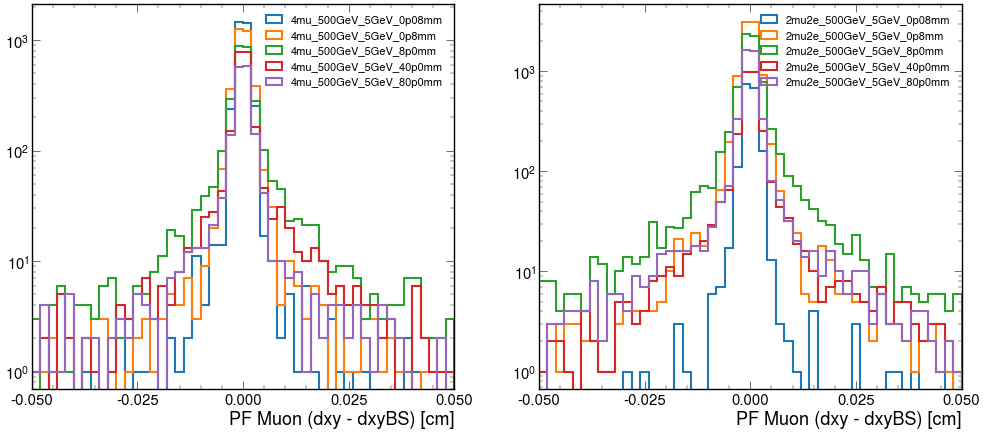

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBS", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyBS.png", bbox_inches="tight")

## dxybs - dxyBS

4mu dxybs - dxyBS structure: [[0.000157, 0.000251, -1.27e-05, 1.49e-05, ... 1.33e-06, 0.000184, -1.33e-05]]
2mu2e dxybs - dxyBS structure: [[5.2e-05, 7e-06], [2.41e-06, 5.53e-05, ... -5.15e-05], [3.6e-05, 7.18e-05]]
4mu dxybs - dxyBS structure: [[-0.000325, -0.000525, -0.00354, 1.91e-05, ... 3.28e-05, -4.77e-05, -6.13e-05]]
2mu2e dxybs - dxyBS structure: [[-2.8e-05, -0.000302], [0.00136, 4.4e-05, ... 3.81e-05], [-4.62e-05, -7.3e-05]]
4mu dxybs - dxyBS structure: [[8.54e-05, -3.88e-05, 3.56e-05, 6.03e-06, ... 0.00108, 0.00125, -0.0019, -1.76e-06]]
2mu2e dxybs - dxyBS structure: [[0.000159, 1.16e-05], [-0.000333, -0.00999, ... 0.000768], [-9.33e-06, 0.0021]]
4mu dxybs - dxyBS structure: [[4.4e-06, -6.19e-05, -6.06e-07, 0.0165, ... 4.37e-05, -0.00318, -0.000571, 0.00241]]
2mu2e dxybs - dxyBS structure: [[-0.00125, -0.000129], [6.48e-05, 4.24e-05], ... 0.000104], [3.86e-05], [-5.33e-05]]
4mu dxybs - dxyBS structure: [[-2.33e-05, -1.1e-05, -0.000227], ... 1e-06, -3.85e-05, -4.54e-05, 6.8e-0

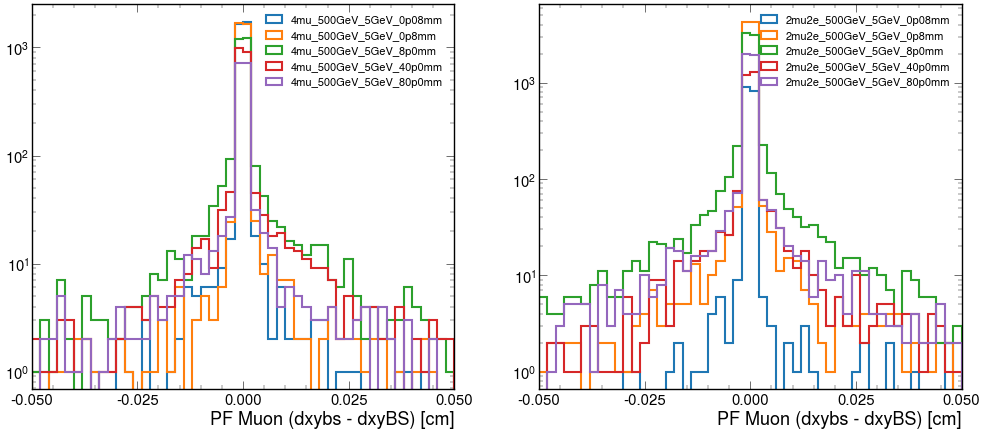

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBS", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxybs-dxyBS.png", bbox_inches="tight")

## dxyBSTraj

4mu dxyBSTraj structure: [[0.0394, 0.0406, 0.0417, 0.0333], ... [0.0399, 0.0452, 0.0368, 0.0428]]
2mu2e dxyBSTraj structure: [[0.026, 0.0488], [0.0428, 0.0185], ... [0.00271, 0.021], [0.0405, 0.0385]]
4mu dxyBSTraj structure: [[0.0356, 0.0247, 0.0339, 0.024], [0.00856, ... [0.0528, 0.0217, 0.0262, 0.0482]]
2mu2e dxyBSTraj structure: [[0.0307, 0.0364], [0.0666, 1.14], [0.0336, ... [0.05, 0.0225], [0.146, 0.168]]
4mu dxyBSTraj structure: [[0.00647, 0.0187, 0.114, 0.0844, 0.00531], ... [0.0682, 0.162, 0.506, 0.322]]
2mu2e dxyBSTraj structure: [[0.0443, 0.0685], [0.091, 0.134], [0.167, ... [0.139, 1.44], [0.0601, 0.108]]
4mu dxyBSTraj structure: [[0.00428, 0.0918, 0.0508, 0.96], [0.00682, ... 0.747], [0.0932, 0.456, 1.24, 2.91]]
2mu2e dxyBSTraj structure: [[0.156, 0.419], [0.0378, 0.584], [0.945], ... [0.115, 0.163], [0.0608], [0.00644]]
4mu dxyBSTraj structure: [[0.0374, 0.038, 0.312], [], [0.34, ... [0.14, 0.0595, 0.0841, 0.0578, 0.0349]]
2mu2e dxyBSTraj structure: [[0.0157, 0.948, 0.018

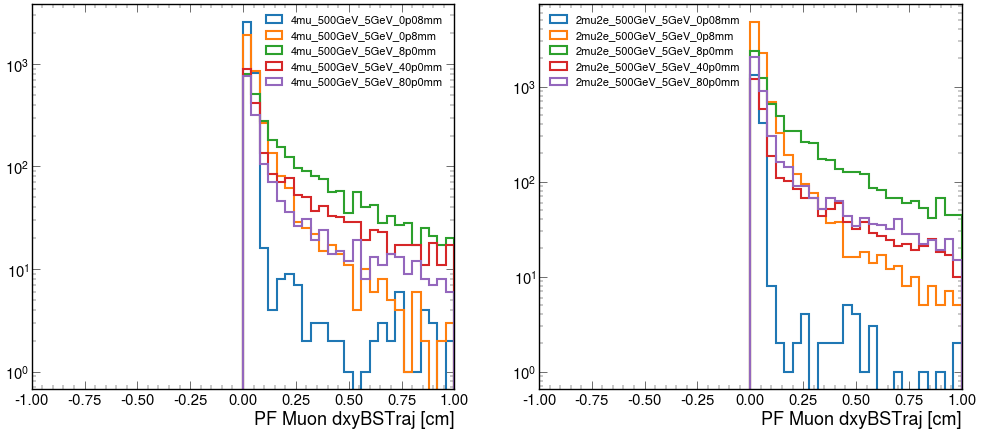

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[1].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBSTraj.png", bbox_inches="tight")

## dxyBSSigned

4mu dxyBSSigned structure: [[-0.000407, 0.00125, 0.00203, -0.00644], ... [0.00168, -0.00295, 0.00577, 0.00113]]
2mu2e dxyBSSigned structure: [[-0.00546, 0.0146], [0.000458, -0.0244, ... -0.00253, 0.0174], [0.000738, -0.00142]]
4mu dxyBSSigned structure: [[-0.00329, -0.00739, 0.00159, -0.00972], ... [-0.0284, -0.00233, -0.00321, -0.0712]]
2mu2e dxyBSSigned structure: [[0.0284, -0.0364], [-0.0274, 1.18], ... [-0.0125, -0.0146], [0.117, 0.192]]
4mu dxyBSSigned structure: [[0.0321, 0.0204, 0.0763, 0.0417, -0.0166], ... [-0.0249, -0.205, -0.463, -0.365]]
2mu2e dxyBSSigned structure: [[0.0526, -0.0617], [-0.103, -0.122], [-0.204, ... [0.117, 1.46], [-0.029, 0.139]]
4mu dxyBSSigned structure: [[-0.0378, 0.131, 0.00891, 0.919], [-0.000895, ... [0.0542, 0.495, -1.28, 2.87]]
2mu2e dxyBSSigned structure: [[-0.181, 0.393], [-0.0267, 0.601], [-0.988], ... [-0.0789, 0.2], [-0.104], [0.0192]]
4mu dxyBSSigned structure: [[0.0724, 0.00194, 0.336], [], ... [-0.172, 0.0311, -0.113, -0.0254, 0.0012]]
2mu2

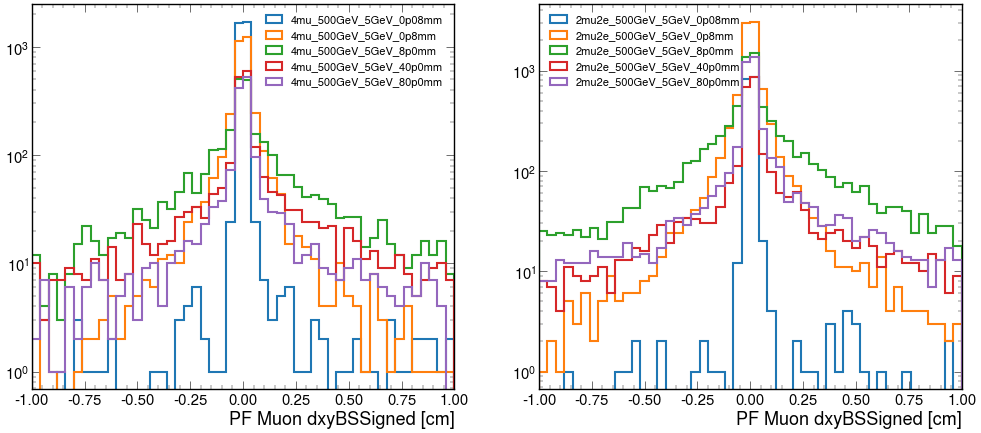

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSSigned", events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[1].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dxyBSSigned.png", bbox_inches="tight")

## dxy - dxyBSSigned

4mu dxy - dxyBSSigned structure: [[-8.92e-05, -0.0012, -0.00106, 0.0139], ... [0.00157, 0.00419, -0.013, -0.000455]]
2mu2e dxy - dxyBSSigned structure: [[0.0101, -0.0299], [-0.000726, 0.049], ... [0.00137, 0.00154], [-0.00114, 0.00321]]
4mu dxy - dxyBSSigned structure: [[0.00263, -0.00347, -0.00647, 0.0225], ... [0.0542, 0.00753, 0.00275, -0.00287]]
2mu2e dxy - dxyBSSigned structure: [[0.00157, 0.00135], [0.0556, -2.35], ... [0.00324, 0.0326], [-0.000168, -0.385]]
4mu dxy - dxyBSSigned structure: [[-0.0641, 0.000129, 3.56e-05, -0.0828, ... 0.0495, 0.412, -0.000431, -0.00147]]
2mu2e dxy - dxyBSSigned structure: [[-0.105, 0.124], [0.206, -0.00913], ... [-0.00232, -2.93], [0.0569, -0.276]]
4mu dxy - dxyBSSigned structure: [[0.000889, -0.00104, 0.000907, -1.82], ... [-0.00249, -0.000742, -0.00253, -5.73]]
2mu2e dxy - dxyBSSigned structure: [[0.000828, 0.00182], [0.0532, -1.2], [2.01, ... 0.161, -0.398], [0.208], [-0.00146]]
4mu dxy - dxyBSSigned structure: [[-0.144, -0.00424, -0.00145], ..

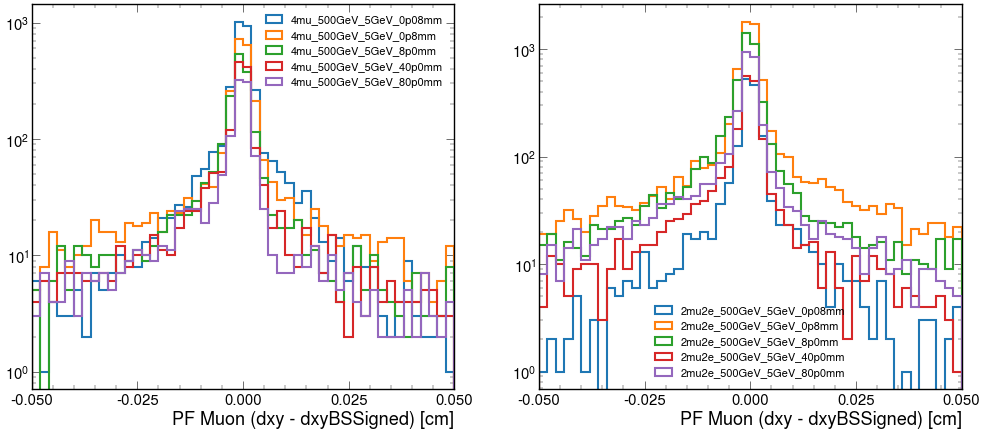

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxy-dxyBSSigned.png", bbox_inches="tight")

## dxybs - dxyBSSigned

4mu dxybs - dxyBSSigned structure: [[0.000971, -0.00226, -1.27e-05, 0.0129], ... [-0.000265, 0.0059, -0.0114, -0.00228]]
2mu2e dxybs - dxyBSSigned structure: [[0.011, -0.0292], [-0.000915, 0.0489, ... -5.15e-05], [-0.00144, 0.00291]]
4mu dxybs - dxyBSSigned structure: [[-0.000325, -0.000525, -0.00354, 0.0195], ... [0.057, 0.0047, -4.77e-05, -6.13e-05]]
2mu2e dxybs - dxyBSSigned structure: [[-2.8e-05, -0.000302], [0.0561, -2.35], ... -0.000113, 0.0293], [-4.62e-05, -0.384]]
4mu dxybs - dxyBSSigned structure: [[-0.0641, -3.88e-05, 3.56e-05, -0.0834, ... 0.051, 0.411, -0.0019, -1.76e-06]]
2mu2e dxybs - dxyBSSigned structure: [[-0.105, 0.123], [0.205, -0.00999], ... [-0.00348, -2.93], [0.0579, -0.275]]
4mu dxybs - dxyBSSigned structure: [[4.4e-06, -6.19e-05, -6.03e-07, -1.82], ... [4.37e-05, -0.00318, -0.000572, -5.73]]
2mu2e dxybs - dxyBSSigned structure: [[-0.00125, -0.000129], [0.0535, -1.2], ... 0.158, -0.401], [0.208], [-5.33e-05]]
4mu dxybs - dxyBSSigned structure: [[-0.145, -0.0039,

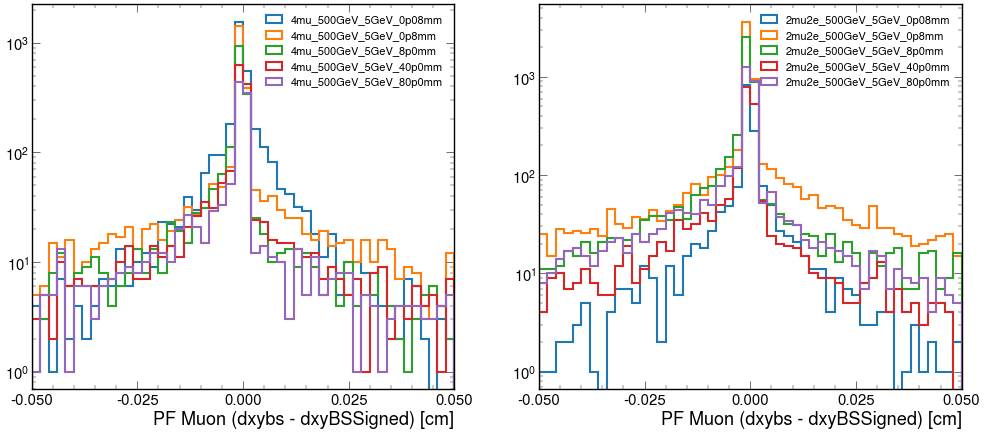

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBSSigned", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxybs-dxyBSSigned.png", bbox_inches="tight")

## dxyBS - dxyBSSigned

4mu dxyBS - dxyBSSigned structure: [[0.000814, -0.00251, 6.98e-10, 0.0129], ... [-2.79e-09, 0.00589, -0.0115, -0.00226]]
2mu2e dxyBS - dxyBSSigned structure: [[0.0109, -0.0292], [-0.000917, 0.0488], ... [4.66e-10, 0], [-0.00148, 0.00284]]
4mu dxyBS - dxyBSSigned structure: [[-2.56e-09, 0, 0, 0.0194], [-1.05e-09, ... -0.129], [0.0569, 0.00467, -2.33e-10, 0]]
2mu2e dxyBS - dxyBSSigned structure: [[1.86e-09, 0], [0.0548, -2.35], [-1.86e-09, ... [9.31e-10, 0.0292], [0, -0.384]]
4mu dxyBS - dxyBSSigned structure: [[-0.0641, 0, 7.45e-09, -0.0834, 0.0331], ... -0.00713], [0.0499, 0.409, 0, 0]]
2mu2e dxyBS - dxyBSSigned structure: [[-0.105, 0.123], [0.206, 7.45e-09], ... [7.45e-09, -2.93], [0.0579, -0.277]]
4mu dxyBS - dxyBSSigned structure: [[3.73e-09, 0, 2.79e-09, -1.84], ... [-1.49e-08, 2.98e-08, -1.07e-06, -5.73]]
2mu2e dxyBS - dxyBSSigned structure: [[0, 0], [0.0535, -1.2], [1.98], [-0.00144, ... 2.22], [0.158, -0.401], [0.208], [0]]
4mu dxyBS - dxyBSSigned structure: [[-0.145, -0.00389, 

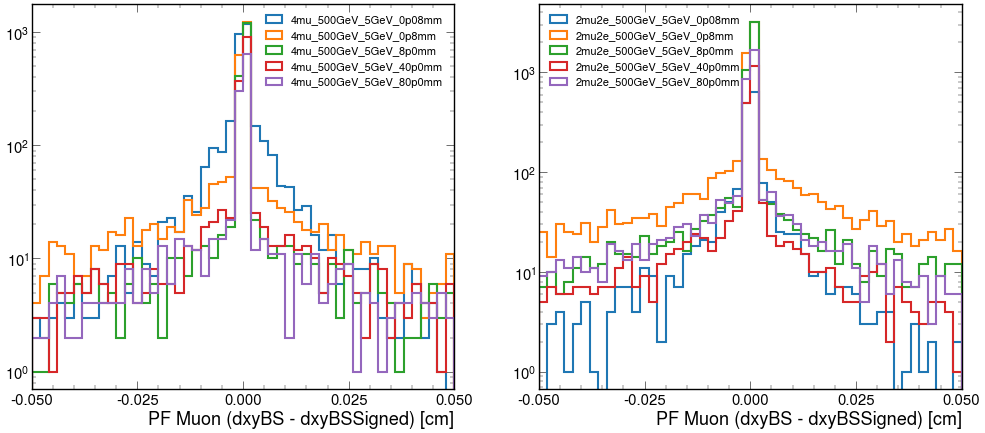

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS - dxyBSSigned", events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.05,-0.025,0,0.025,0.05])
ax[1].set_xticks([-0.05,-0.025,0,0.025,0.05])
plt.savefig("../Plots/PF_MUON/Displacement/dxyBS-dxyBSSigned.png", bbox_inches="tight")

## dz

4mu dz structure: [[0.00124, -0.00228, -0.00288, 0.0148], ... [-0.0121, 0.000582, -0.0134, 0.00152]]
2mu2e dz structure: [[0.00723, -0.00673], [-0.000697, -0.0307], ... 0.000356, 0.0141], [-0.0143, 0.0154]]
4mu dz structure: [[-0.00115, 0.0801, 3.9, 0.0142], ... [0.0208, -0.00452, 0.000114, -0.0639]]
2mu2e dz structure: [[-0.00287, 0.00767], [-0.0046, 0.311], ... [-0.0338, 0.0499], [0.11, -0.141]]
4mu dz structure: [[-0.0778, 12.3, 0.204, 3.61, -0.542], ... [-0.0231, -0.0106, 0.00816, 0.271]]
2mu2e dz structure: [[5.51, 5.61], [0.561, -0.562], [6.69, ... 0.916], [1.94, 0.0437], [-2.66, -9.06]]
4mu dz structure: [[-2.09, -0.14, -5.46, 1.34], [-2.87, 0.672, ... -0.649], [22.8, 6.12, -42.2, 14.4]]
2mu2e dz structure: [[0.6, -0.0145], [0.0174, -0.255], [1.49], ... [7.77, 8.04], [0.378], [7.28]]
4mu dz structure: [[0.291, 5.13, -6.42], [], [3.98, ... -6.99], [-1.94, -3.59, 1.62, -8.98, -4.46]]
2mu2e dz structure: [[-0.0928, -2.4, -2.7], [-1.58], [4.27], ... 0.0088], [-7.57, -5.87], [10.5, 3

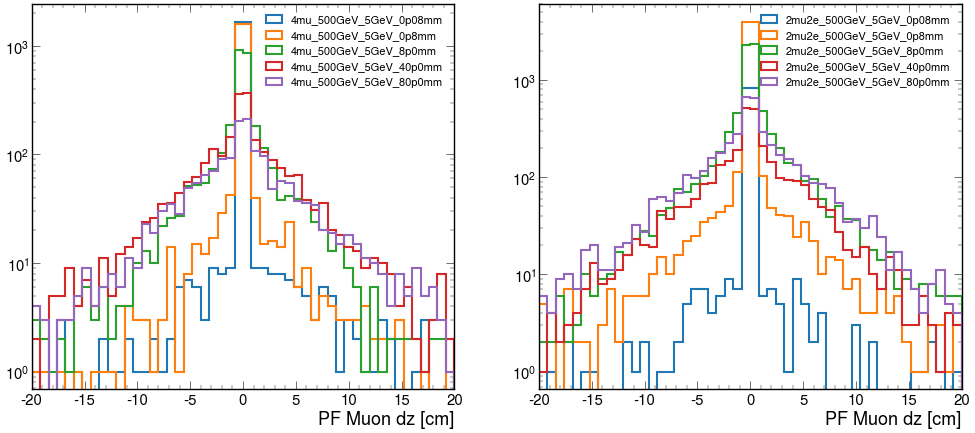

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon dz [cm]')
ax[1].set_xlabel('PF Muon dz [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dz.png", bbox_inches="tight")

## dzErr

4mu dzErr structure: [[0.00253, 0.00256, 0.0025, 0.00235], ... [0.0025, 0.00385, 0.00345, 0.00232]]
2mu2e dzErr structure: [[0.00629, 0.00854], [0.00244, 0.00296], ... [0.00278, 0.00339], [0.00415, 0.00397]]
4mu dzErr structure: [[0.00302, 0.00403, 0.469, 0.00327], ... [0.00281, 0.00247, 0.00256, 0.00278]]
2mu2e dzErr structure: [[0.00397, 0.00381], [0.00439, 0.0072], ... [0.00385, 0.00388], [0.00739, 0.00708]]
4mu dzErr structure: [[0.00427, 0.0117, 0.0061, 3.59, 0.0116], ... [0.00397, 0.00854, 0.0176, 0.00446]]
2mu2e dzErr structure: [[0.00323, 0.00385], [0.0771, 0.0781], ... [0.0356, 0.042], [0.48, 0.104]]
4mu dzErr structure: [[0.852, 0.0312, 0.984, 0.176], [4.12, 0.41, ... 0.0111], [2.62, 0.148, 4.94, 0.254]]
2mu2e dzErr structure: [[0.0508, 0.00903], [0.00519, 0.00623], ... 0.00403, 0.00476], [0.082], [0.285]]
4mu dzErr structure: [[1.05, 4.56, 0.0131], [], [2.53, 0.5, ... [1.2], [0.106, 0.484, 0.68, 3.12, 0.0109]]
2mu2e dzErr structure: [[0.898, 0.516, 4.56], [2.47], [0.24], ...

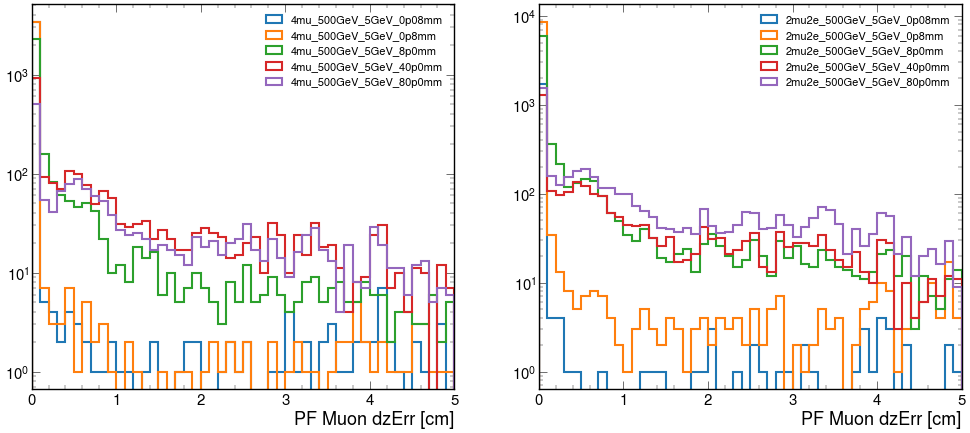

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzErr", events_4mu[i_4mu].dzErr, events_2mu2e[i_2mu].dzErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzErr), range=(0,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzErr), range=(0,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Muon dzErr [cm]')
ax[1].set_xlabel('PF Muon dzErr [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dzErr.png", bbox_inches="tight")

## dzPV

4mu dzPV structure: [[0.00208, -0.00207, -0.00288, 0.0148], ... [-0.0124, 0.000582, -0.013, 0.00162]]
2mu2e dzPV structure: [[0.00669, -0.0069], [-0.000697, -0.0307], ... -0.000149, 0.0138], [-0.0143, 0.0156]]
4mu dzPV structure: [[-0.000751, 0.0798, 1.88, 0.0142], ... [0.021, -0.00413, -0.000781, -0.0639]]
2mu2e dzPV structure: [[-0.00287, 0.00718], [0.0571, 0.311], ... [-0.0332, 0.0499], [0.11, -0.141]]
4mu dzPV structure: [[-0.0779, 12.3, 0.204, 3.61, -0.542], ... [0.0216, -0.00779, -0.000662, 0.271]]
2mu2e dzPV structure: [[5.51, 5.61], [0.534, -0.517], [6.59, ... 0.918], [1.93, 0.042], [-2.66, -8.98]]
4mu dzPV structure: [[-2.09, -0.14, -5.46, 1.36], [-2.87, 0.673, ... -0.65], [22.8, 6.12, -42.2, 14.4]]
2mu2e dzPV structure: [[0.582, -0.0133], [0.0161, -0.255], [0.287], ... [7.76, 8.04], [0.378], [7.28]]
4mu dzPV structure: [[0.291, 5.13, -6.42], [], [3.98, ... -6.99], [-1.96, -3.59, 1.62, -8.97, -4.46]]
2mu2e dzPV structure: [[-0.0928, -1.94, -2.7], [-1.58], [4.27], ... 0.00829],

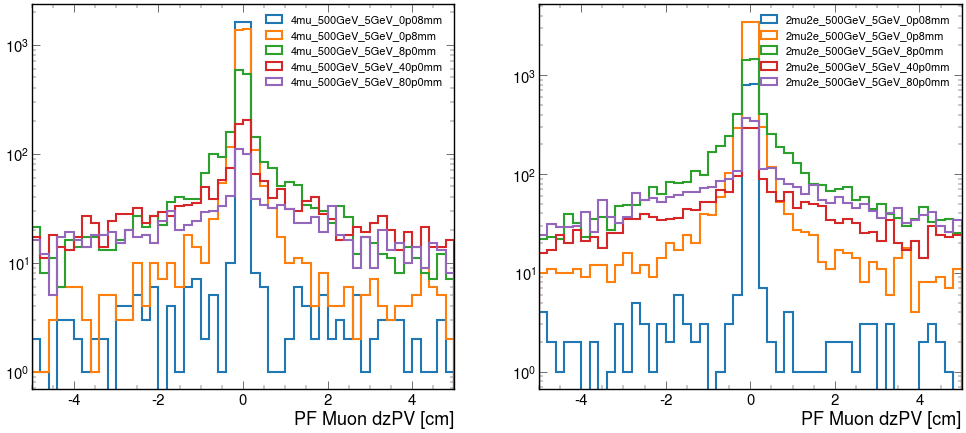

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzPV", events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzPV), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzPV), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('PF Muon dzPV [cm]')
ax[1].set_xlabel('PF Muon dzPV [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dzPV.png", bbox_inches="tight")

## dz - dzPV

4mu dz - dzPV structure: [[-0.000837, -0.000215, -1.27e-07, -2.12e-06, ... -9.98e-08, -0.000338, -9.85e-05]]
2mu2e dz - dzPV structure: [[0.000532, 0.000172], [6.86e-07, -3.98e-06, ... 0.000265], [1.36e-05, -0.000148]]
4mu dz - dzPV structure: [[-0.000399, 0.000318, 2.02, 2.28e-06, ... -0.000394, 0.000895, -4.29e-05]]
2mu2e dz - dzPV structure: [[-6.05e-07, 0.000489], [-0.0617, -0.000107, ... 1.33e-05], [-0.000449, -1.4e-05]]
4mu dz - dzPV structure: [[6.21e-05, -0.00148, -2.39e-05, 2.24e-05, ... -0.0447, -0.00277, 0.00882, 2.69e-05]]
2mu2e dz - dzPV structure: [[-0.00257, -0.00186], [0.0268, -0.0449], ... 0.00896, 0.00168], [-0.00076, -0.0862]]
4mu dz - dzPV structure: [[-0.000495, 2.45e-05, -0.00194, -0.0211], ... [0.00624, 0.00241, -0.015, 0.0348]]
2mu2e dz - dzPV structure: [[0.0174, -0.00123], [0.00129, 5.68e-05], ... -0.00149], [-0.000722], [-0.00109]]
4mu dz - dzPV structure: [[-2.74e-05, 0.000828, 0.000379], ... 0.000651, 0.000197, -0.00239, -0.00011]]
2mu2e dz - dzPV structure

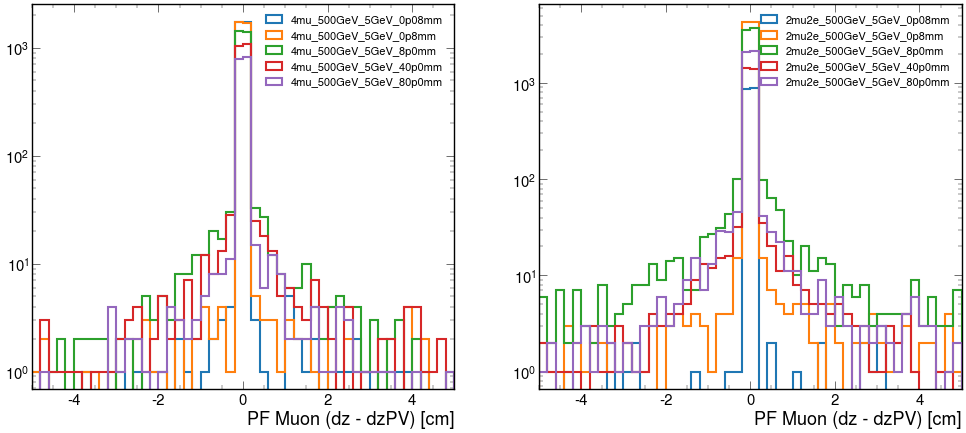

In [25]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzPV", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dz-dzPV.png", bbox_inches="tight")

## dzBS

4mu dzBS structure: [[2.63, 2.63, 2.63, 2.65], [0.656, 0.666, ... -0.392], [5.51, 5.52, 5.51, 5.52]]
2mu2e dzBS structure: [[2.63, 2.62], [0.655, 0.625], [3.18, 3.19, ... -0.463], [4.44, 4.46], [3.75, 3.78]]
4mu dzBS structure: [[2.63, 2.71, 4.51, 2.64], [0.659, 0.643, ... 4.54, 4.3], [1.2, 1.17, 1.17, 1.11]]
2mu2e dzBS structure: [[2.63, 2.64], [0.717, 0.971], [3.16, 3.24, ... 7.65], [6.86, 6.95], [5.94, 5.69]]
4mu dzBS structure: [[2.55, 15, 2.83, 6.24, 2.09], [0.756, ... 1.17], [-5.09, -5.12, -5.11, -4.84]]
2mu2e dzBS structure: [[2.59, 2.69], [1.19, 0.141], [3.31, 2.01, ... -6.91], [1.57, -0.325], [-1.19, -7.5]]
4mu dzBS structure: [[0.542, 2.49, -2.83, 3.99], [-3.57, -0.0318, ... 4.42], [20.8, 4.07, -44.2, 12.4]]
2mu2e dzBS structure: [[2.8, 2.2], [0.673, 0.401], [3.46], [-3.96, ... 16.7], [6.68, 6.95], [2.38], [5.76]]
4mu dzBS structure: [[-1.93, 2.91, -8.64], [], [0.951, ... -1.3], [0.945, -0.684, 4.53, -6.07, -1.56]]
2mu2e dzBS structure: [[2.54, 0.689, -0.0672], [0.841], [6.37

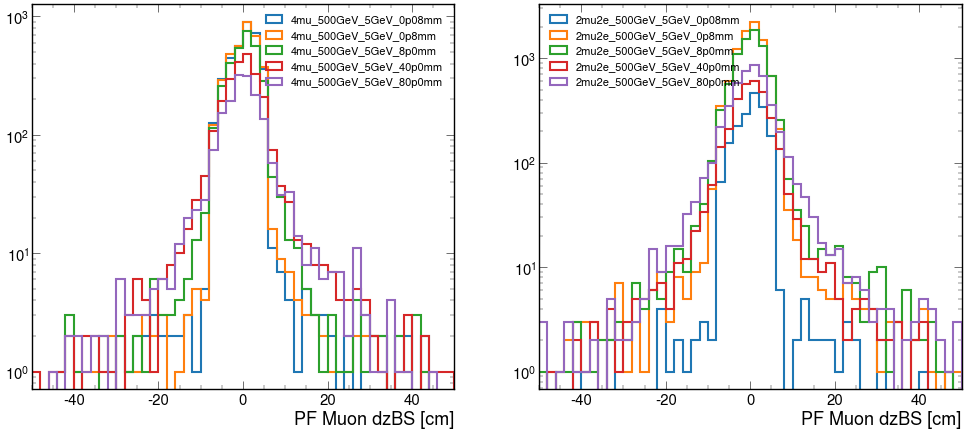

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-50,50)
ax[1].set_xlim(-50,50)
ax[0].set_xlabel('PF Muon dzBS [cm]')
ax[1].set_xlabel('PF Muon dzBS [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dzBS.png", bbox_inches="tight")

## dz - dzBS

4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63], [-0.65, ... -2.26], [-5.52, -5.52, -5.52, -5.52]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.656, -0.656], [-3.18, ... 2.54], [-4.44, -4.44], [-3.76, -3.77]]
4mu dz - dzBS structure: [[-2.63, -2.63, -0.612, -2.63], [-0.658, ... -4.55], [-1.17, -1.17, -1.17, -1.17]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.722, -0.66], [-3.18, ... -7.61], [-6.9, -6.9], [-5.84, -5.83]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63, -2.64], [-0.658, ... -1.18], [5.07, 5.11, 5.12, 5.11]]
2mu2e dz - dzBS structure: [[2.92, 2.92], [-0.631, -0.703], [3.39, ... 7.82], [0.376, 0.368], [-1.48, -1.56]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.65], [0.704, 0.704, ... -5.07], [2.06, 2.05, 2.04, 2.08]]
2mu2e dz - dzBS structure: [[-2.2, -2.22], [-0.656, -0.657], [-1.97], ... -1.53], [1.09, 1.09], [-2], [1.53]]
4mu dz - dzBS structure: [[2.22, 2.22, 2.22], [], [3.03, ... -5.69], [-2.88, -2.91, -2.91, -2.91, -2.91]]
2mu2e dz - dzBS s

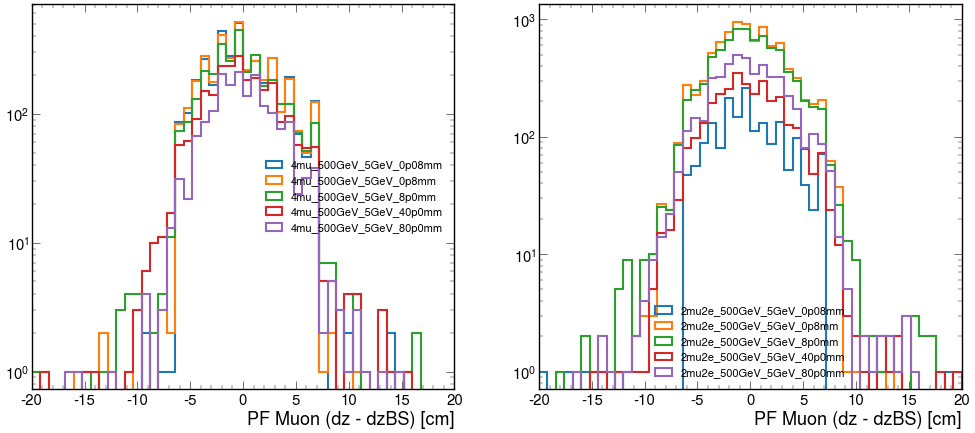

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Displacement/dz-dzBS.png", bbox_inches="tight")